In [19]:
import pandas as pd
import os

In [20]:
path = r"C:\Users\arpee\OneDrive\Desktop\RUD\MachineLearningCSV\MachineLearningCVE"

In [21]:
os.listdir(path)

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [22]:
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
combined_df = pd.concat([
    pd.read_csv(os.path.join(path, file)) 
    for file in csv_files
], ignore_index=True)

print(f"Combined DataFrame shape: {combined_df.shape}")

Combined DataFrame shape: (2830743, 79)


In [23]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
combined_df.columns = combined_df.columns.str.strip()

In [25]:
combined_df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [26]:
# Get all columns except 'Label'
feature_columns = combined_df.columns.drop('Label')

# Check if duplicates exist (excluding Label column)
has_duplicates = combined_df.duplicated(subset=feature_columns).any()
print(f"Duplicates found (excluding Label): {has_duplicates}")

# Count number of duplicate rows
duplicate_count = combined_df.duplicated(subset=feature_columns).sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Show original shape
print(f"Original shape: {combined_df.shape}")

# Remove duplicate rows (keeping first occurrence)
combined_df_cleaned = combined_df.drop_duplicates(subset=feature_columns, keep='first')

# Show new shape
print(f"Shape after removing duplicates: {combined_df_cleaned.shape}")
print(f"Rows removed: {len(combined_df) - len(combined_df_cleaned)}")

Duplicates found (excluding Label): True
Number of duplicate rows: 309079
Original shape: (2830743, 79)
Shape after removing duplicates: (2521664, 79)
Rows removed: 309079


In [27]:
label_counts = combined_df_cleaned['Label'].value_counts()
label_percentages = combined_df_cleaned['Label'].value_counts(normalize=True) * 100

print("Sample counts per label:")
print(label_counts)
print("\nPercentages:")
print(label_percentages.round(2))

# Or combine both
summary = pd.DataFrame({
    'Count': label_counts,
    'Percentage': label_percentages.round(2)
})
print("\nSummary:")
print(summary)

Sample counts per label:
Label
BENIGN                        2095885
DoS Hulk                       172751
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5384
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Percentages:
Label
BENIGN                        83.12
DoS Hulk                       6.85
DDoS                           5.08
PortScan                       3.60
DoS GoldenEye                  0.41
FTP-Patator                    0.24
DoS slowloris                  0.21
DoS Slowhttptest               0.21
SSH-Patator                    0.13
Bot                          

In [28]:
import numpy as np
combined_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\arpee\AppData\Local\Temp\ipykernel_17916\3927347581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)


In [29]:
initial_rows = combined_df_cleaned.shape[0]
combined_df_cleaned.dropna(inplace=True)
cleaned_rows = combined_df_cleaned.shape[0]
print(f"Dropped {initial_rows - cleaned_rows} rows with NaN values.")

Dropped 1563 rows with NaN values.


C:\Users\arpee\AppData\Local\Temp\ipykernel_17916\756281415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned.dropna(inplace=True)


In [30]:
combined_df_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2520101 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow 

C:\Users\arpee\AppData\Local\Temp\ipykernel_17916\1462797465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=combined_df_cleaned['Label'], order=combined_df_cleaned['Label'].value_counts().index, palette='viridis')


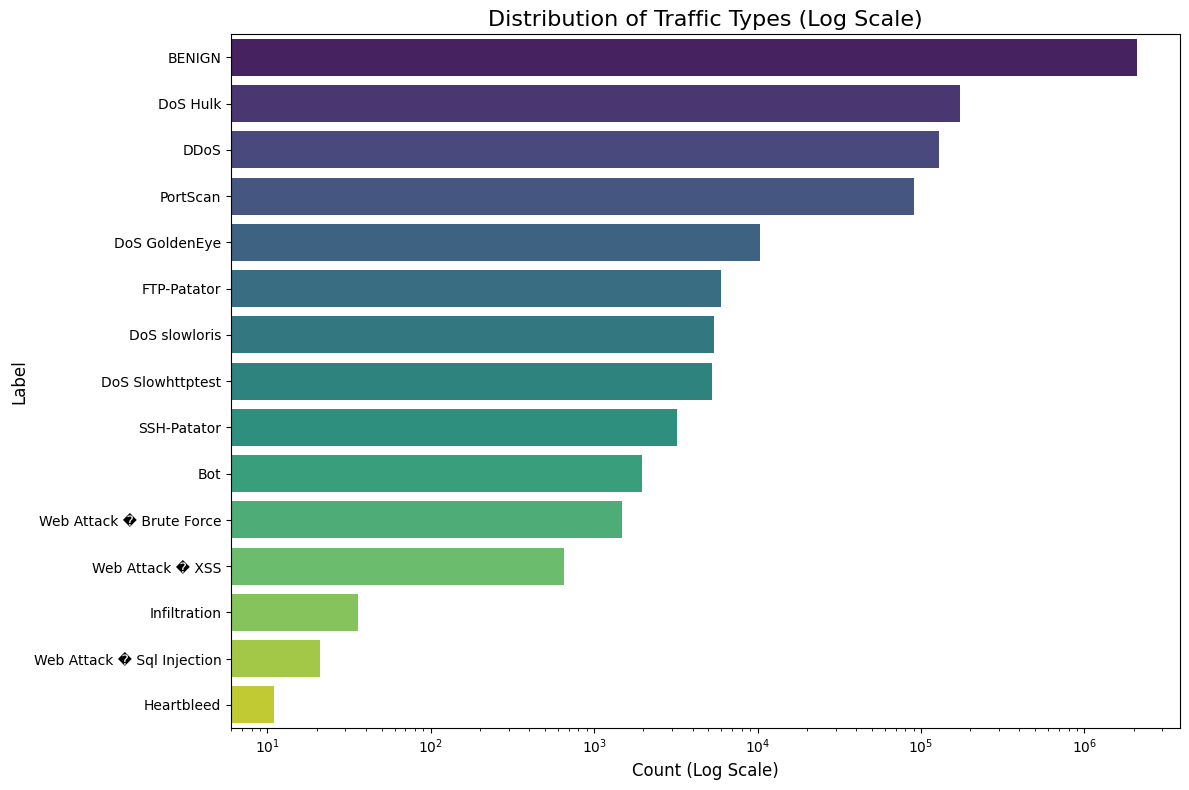

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
ax = sns.countplot(y=combined_df_cleaned['Label'], order=combined_df_cleaned['Label'].value_counts().index, palette='viridis')
ax.set_xscale('log') # Use a log scale due to heavy class imbalance
plt.title('Distribution of Traffic Types (Log Scale)', fontsize=16)
plt.xlabel('Count (Log Scale)', fontsize=12)
plt.ylabel('Label', fontsize=12)
plt.tight_layout()
plt.show()

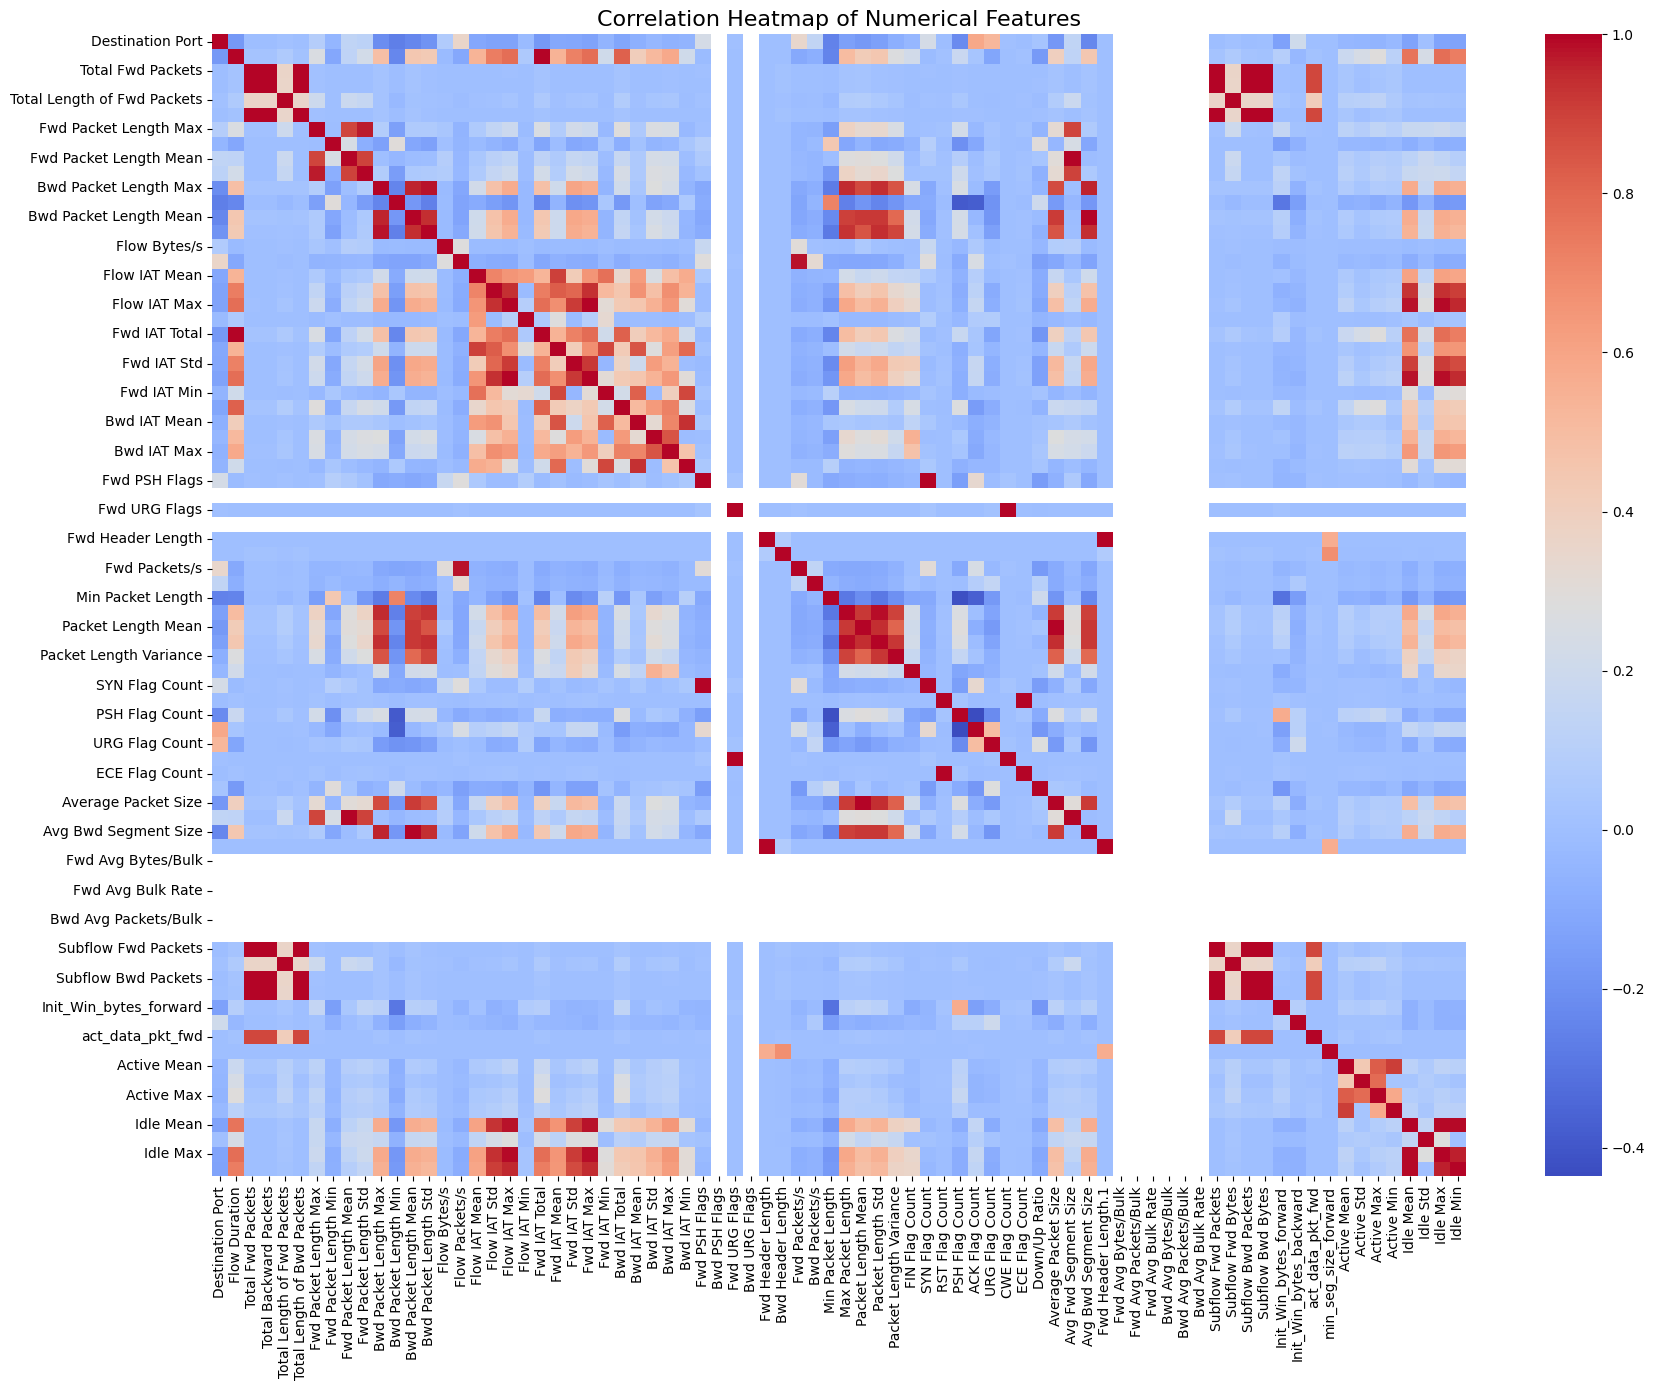

In [32]:
numeric_df = combined_df_cleaned.select_dtypes(include=np.number)
    
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False) 
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
# Save the figure before showing it
# plt.savefig("correlation_heatmap.png", dpi=300)
# print("Saved correlation heatmap to 'correlation_heatmap.png'")
plt.show()

In [33]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
import os
import random

class FocalLoss(nn.Module):
    """
    Focal Loss implementation for handling class imbalance
    """
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class NeuralNetworkClassifier(nn.Module):
    """
    Deep Neural Network for binary classification
    """
    def __init__(self, input_dim, hidden_dims=[512, 256, 128, 64], dropout_rate=0.3):
        super(NeuralNetworkClassifier, self).__init__()
        layers = []
        prev_dim = input_dim
        
        # Hidden layers
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(prev_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_dim = hidden_dim
        
        # Output layer
        layers.append(nn.Linear(prev_dim, 2))  # Binary classification
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class CICIDSNeuralClassifier:
    def __init__(self, data_path=None, combined_df=None):
        """
        Initialize the neural network classifier
        """
        if combined_df is not None:
            self.df = combined_df.copy()
        else:
            self.df = self.load_and_combine_data(data_path)
        
        self.X = None
        self.y = None
        self.X_train = None
        self.X_val = None
        self.X_test = None
        self.y_train = None
        self.y_val = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.model = None
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.feature_names = None
        print(f"Using device: {self.device}")

    def load_and_combine_data(self, path):
        """Load and combine CSV files from the given path"""
        csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
        print(f"Found {len(csv_files)} CSV files to combine...")
        
        dfs = []
        for file in tqdm(csv_files, desc="Loading CSV files"):
            df = pd.read_csv(os.path.join(path, file))
            dfs.append(df)
        
        print("Combining all DataFrames...")
        combined_df = pd.concat(dfs, ignore_index=True)
        print(f"Combined dataset shape: {combined_df.shape}")
        return combined_df

    def preprocess_data(self, remove_highly_correlated=True, correlation_threshold=0.95):
        """
        Comprehensive data preprocessing
        """
        print("Starting data preprocessing...")
        
        # Clean column names
        self.df.columns = self.df.columns.str.strip()
        
        # Handle infinite values
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Drop rows with NaN values
        initial_rows = self.df.shape[0]
        self.df.dropna(inplace=True)
        print(f"Dropped {initial_rows - self.df.shape[0]} rows with NaN values.")
        
        # Create binary labels: 1 for malicious, 0 for benign
        self.df['Binary_Label'] = (self.df['Label'] != 'BENIGN').astype(int)
        
        # Separate features and target
        feature_columns = [col for col in self.df.columns if col not in ['Label', 'Binary_Label']]
        self.X = self.df[feature_columns]
        self.y = self.df['Binary_Label']
        self.feature_names = feature_columns
        
        print(f"Dataset shape after preprocessing: {self.X.shape}")
        print(f"Class distribution: {Counter(self.y)}")
        
        # Remove highly correlated features
        if remove_highly_correlated:
            self.X = self.remove_correlated_features(self.X, correlation_threshold)
            print(f"Shape after removing correlated features: {self.X.shape}")
        
        return self.X, self.y

    def remove_correlated_features(self, X, threshold=0.95):
        """Remove highly correlated features"""
        print("Computing correlation matrix...")
        corr_matrix = X.corr().abs()
        upper_triangle = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )
        
        # Find features with correlation greater than threshold
        print("Identifying highly correlated features...")
        to_drop = []
        for column in tqdm(upper_triangle.columns, desc="Checking correlations"):
            if any(upper_triangle[column] > threshold):
                to_drop.append(column)
        
        print(f"Removing {len(to_drop)} highly correlated features")
        return X.drop(columns=to_drop)

    def split_data(self, test_size=0.2, val_size=0.2, random_state=42):
        """
        Split data into train, validation, and test sets using stratified sampling
        """
        print("Performing stratified train/test/validation split...")
        
        # First split: separate test set
        X_temp, self.X_test, y_temp, self.y_test = train_test_split(
            self.X, self.y, 
            test_size=test_size, 
            random_state=random_state, 
            stratify=self.y
        )
        
        # Second split: separate train and validation from remaining data
        # Calculate validation size relative to remaining data
        val_size_adjusted = val_size / (1 - test_size)
        
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(
            X_temp, y_temp,
            test_size=val_size_adjusted,
            random_state=random_state,
            stratify=y_temp
        )
        
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Validation set shape: {self.X_val.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Training set class distribution: {Counter(self.y_train)}")
        print(f"Validation set class distribution: {Counter(self.y_val)}")
        print(f"Test set class distribution: {Counter(self.y_test)}")
        
        # Scale the data
        print("Scaling features...")
        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_val = self.scaler.transform(self.X_val)
        self.X_test = self.scaler.transform(self.X_test)
        
        print("Data splitting and scaling completed!")

    def create_data_loaders(self, batch_size=1024):
        """Create PyTorch data loaders for train, validation, and test sets"""
        # Convert to tensors
        X_train_tensor = torch.FloatTensor(self.X_train).to(self.device)
        y_train_tensor = torch.LongTensor(self.y_train.values if hasattr(self.y_train, 'values') else self.y_train).to(self.device)
        
        X_val_tensor = torch.FloatTensor(self.X_val).to(self.device)
        y_val_tensor = torch.LongTensor(self.y_val.values if hasattr(self.y_val, 'values') else self.y_val).to(self.device)
        
        X_test_tensor = torch.FloatTensor(self.X_test).to(self.device)
        y_test_tensor = torch.LongTensor(self.y_test.values if hasattr(self.y_test, 'values') else self.y_test).to(self.device)
        
        # Create datasets
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
        
        # Create data loaders
        self.train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        self.test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        
        print(f"Created data loaders with batch size: {batch_size}")
        return self.train_loader, self.val_loader, self.test_loader

    def create_model(self, hidden_dims=[512, 256, 128, 64], dropout_rate=0.3):
        """Create the neural network model"""
        input_dim = self.X_train.shape[1]
        self.model = NeuralNetworkClassifier(
            input_dim=input_dim,
            hidden_dims=hidden_dims,
            dropout_rate=dropout_rate
        ).to(self.device)
        
        print(f"Created neural network with input dimension: {input_dim}")
        print(f"Hidden layers: {hidden_dims}")
        print(f"Total parameters: {sum(p.numel() for p in self.model.parameters())}")
        return self.model

    def train_model(self, epochs=100, learning_rate=0.001, weight_decay=1e-5, 
                    focal_alpha=1, focal_gamma=2, patience=10):
        """Train the neural network with focal loss and validation monitoring"""
        if self.model is None:
            self.create_model()
        
        # Initialize loss function and optimizer
        criterion = FocalLoss(alpha=focal_alpha, gamma=focal_gamma)
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
        
        # Training history
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []
        best_val_loss = float('inf')
        patience_counter = 0
        
        print(f"Starting training for {epochs} epochs...")
        
        for epoch in tqdm(range(epochs), desc="Training Progress"):
            # Training phase
            self.model.train()
            total_train_loss = 0
            correct_train = 0
            total_train = 0
            
            for batch_X, batch_y in self.train_loader:
                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                
                total_train_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_train += batch_y.size(0)
                correct_train += (predicted == batch_y).sum().item()
            
            # Validation phase
            self.model.eval()
            total_val_loss = 0
            correct_val = 0
            total_val = 0
            
            with torch.no_grad():
                for batch_X, batch_y in self.val_loader:
                    outputs = self.model(batch_X)
                    loss = criterion(outputs, batch_y)
                    
                    total_val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total_val += batch_y.size(0)
                    correct_val += (predicted == batch_y).sum().item()
            
            # Calculate metrics
            avg_train_loss = total_train_loss / len(self.train_loader)
            train_accuracy = 100 * correct_train / total_train
            avg_val_loss = total_val_loss / len(self.val_loader)
            val_accuracy = 100 * correct_val / total_val
            
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_accuracy)
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_accuracy)
            
            # Learning rate scheduling
            scheduler.step(avg_val_loss)
            
            # Early stopping based on validation loss
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_model.pth')
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break
            
            if (epoch + 1) % 10 == 0:
                tqdm.write(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, '
                          f'Train Acc: {train_accuracy:.2f}%, Val Loss: {avg_val_loss:.4f}, '
                          f'Val Acc: {val_accuracy:.2f}%')
        
        # Load best model
        self.model.load_state_dict(torch.load('best_model.pth'))
        
        # Plot training history
        self.plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies)
        
        return train_losses, train_accuracies, val_losses, val_accuracies

    def plot_training_history(self, train_losses, train_accuracies, val_losses, val_accuracies):
        """Plot training and validation loss and accuracy"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Loss plots
        ax1.plot(train_losses, label='Training Loss', color='blue')
        ax1.plot(val_losses, label='Validation Loss', color='red')
        ax1.set_title('Training and Validation Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax1.grid(True)
        
        # Accuracy plots
        ax2.plot(train_accuracies, label='Training Accuracy', color='blue')
        ax2.plot(val_accuracies, label='Validation Accuracy', color='red')
        ax2.set_title('Training and Validation Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        ax2.legend()
        ax2.grid(True)
        
        # Combined loss plot (zoomed)
        ax3.plot(train_losses, label='Training Loss', color='blue', alpha=0.7)
        ax3.plot(val_losses, label='Validation Loss', color='red', alpha=0.7)
        ax3.set_title('Loss Comparison (Detailed View)')
        ax3.set_xlabel('Epoch')
        ax3.set_ylabel('Loss')
        ax3.legend()
        ax3.grid(True)
        
        # Learning curve
        epochs = range(1, len(train_losses) + 1)
        ax4.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
        ax4.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
        ax4.fill_between(epochs, train_accuracies, alpha=0.3, color='blue')
        ax4.fill_between(epochs, val_accuracies, alpha=0.3, color='red')
        ax4.set_title('Learning Curves')
        ax4.set_xlabel('Epoch')
        ax4.set_ylabel('Accuracy (%)')
        ax4.legend()
        ax4.grid(True)
        
        plt.tight_layout()
        plt.show()

    def evaluate_model(self):
        """Evaluate the trained model on test set"""
        if self.model is None:
            print("Model not trained yet!")
            return
        
        self.model.eval()
        all_predictions = []
        all_probabilities = []
        all_targets = []
        
        print("Making predictions on test set...")
        with torch.no_grad():
            for batch_X, batch_y in tqdm(self.test_loader, desc="Evaluating"):
                outputs = self.model(batch_X)
                probabilities = torch.softmax(outputs, dim=1)
                _, predicted = torch.max(outputs, 1)
                
                all_predictions.extend(predicted.cpu().numpy())
                all_probabilities.extend(probabilities[:, 1].cpu().numpy())
                all_targets.extend(batch_y.cpu().numpy())
        
        # Convert to numpy arrays
        y_true = np.array(all_targets)
        y_pred = np.array(all_predictions)
        y_prob = np.array(all_probabilities)
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_prob)
        
        print("\n" + "="*50)
        print("TEST SET EVALUATION RESULTS")
        print("="*50)
        print("Classification Report:")
        print(classification_report(y_true, y_pred, target_names=['Benign', 'Malicious']))
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC-AUC Score: {roc_auc:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Benign', 'Malicious'],
                   yticklabels=['Benign', 'Malicious'])
        plt.title('Confusion Matrix - Neural Network (Test Set)')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
        return {
            'predictions': y_pred,
            'probabilities': y_prob,
            'accuracy': accuracy,
            'f1_score': f1,
            'roc_auc': roc_auc
        }

    def classify_random_samples(self, n_samples=10):
        """
        Classify random samples and visualize the results
        """
        if self.model is None:
            print("Model not trained yet!")
            return
        
        print(f"\nClassifying {n_samples} random samples...")
        
        # Get random indices from test set
        test_indices = random.sample(range(len(self.X_test)), min(n_samples, len(self.X_test)))
        
        # Get the samples
        sample_X = self.X_test[test_indices]
        sample_y = self.y_test.iloc[test_indices] if hasattr(self.y_test, 'iloc') else self.y_test[test_indices]
        
        # Convert to tensor
        sample_X_tensor = torch.FloatTensor(sample_X).to(self.device)
        
        # Make predictions
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(sample_X_tensor)
            probabilities = torch.softmax(outputs, dim=1)
            _, predictions = torch.max(outputs, 1)
        
        # Convert back to numpy/lists
        predictions_np = predictions.cpu().numpy()
        probabilities_np = probabilities.cpu().numpy()
        
        # Create visualization
        fig, axes = plt.subplots(2, 5, figsize=(20, 8))
        axes = axes.flatten()
        
        for i in range(min(n_samples, 10)):  # Limit to 10 for visualization
            ax = axes[i]
            
            # Get sample info
            true_label = sample_y.iloc[i] if hasattr(sample_y, 'iloc') else sample_y[i]
            pred_label = predictions_np[i]
            prob_benign = probabilities_np[i][0]
            prob_malicious = probabilities_np[i][1]
            
            # Create bar plot of probabilities
            labels = ['Benign', 'Malicious']
            probs = [prob_benign, prob_malicious]
            colors = ['green' if pred_label == 0 else 'lightgreen', 
                     'red' if pred_label == 1 else 'lightcoral']
            
            bars = ax.bar(labels, probs, color=colors, alpha=0.7)
            
            # Highlight the predicted class
            if pred_label == 0:
                bars[0].set_edgecolor('darkgreen')
                bars[0].set_linewidth(3)
            else:
                bars[1].set_edgecolor('darkred')
                bars[1].set_linewidth(3)
            
            # Set title with true vs predicted
            true_class = 'Benign' if true_label == 0 else 'Malicious'
            pred_class = 'Benign' if pred_label == 0 else 'Malicious'
            
            if true_label == pred_label:
                title_color = 'green'
                result = '✓ Correct'
            else:
                title_color = 'red'
                result = '✗ Wrong'
            
            ax.set_title(f'Sample {i+1}\nTrue: {true_class}\nPred: {pred_class}\n{result}', 
                        color=title_color, fontweight='bold')
            ax.set_ylabel('Probability')
            ax.set_ylim(0, 1)
            
            # Add probability values on bars
            for j, (bar, prob) in enumerate(zip(bars, probs)):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')
        
        # Hide unused subplots
        for i in range(n_samples, 10):
            axes[i].set_visible(False)
        
        plt.suptitle(f'Random Sample Classifications (Test Set)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print detailed results
        print("\nDetailed Sample Classification Results:")
        print("-" * 80)
        
        correct_predictions = 0
        for i in range(n_samples):
            true_label = sample_y.iloc[i] if hasattr(sample_y, 'iloc') else sample_y[i]
            pred_label = predictions_np[i]
            prob_benign = probabilities_np[i][0]
            prob_malicious = probabilities_np[i][1]
            
            true_class = 'Benign' if true_label == 0 else 'Malicious'
            pred_class = 'Benign' if pred_label == 0 else 'Malicious'
            confidence = max(prob_benign, prob_malicious)
            
            if true_label == pred_label:
                correct_predictions += 1
                status = "✓ CORRECT"
            else:
                status = "✗ WRONG"
            
            print(f"Sample {i+1:2d}: True={true_class:9s} | Pred={pred_class:9s} | "
                  f"Confidence={confidence:.3f} | {status}")
        
        accuracy = correct_predictions / n_samples
        print("-" * 80)
        print(f"Sample Accuracy: {correct_predictions}/{n_samples} = {accuracy:.2%}")
        
        return {
            'sample_indices': test_indices,
            'true_labels': sample_y,
            'predictions': predictions_np,
            'probabilities': probabilities_np,
            'accuracy': accuracy
        }

    def save_model(self, filepath='cicids_nn_model.pth'):
        """Save the trained model"""
        if self.model is not None:
            torch.save({
                'model_state_dict': self.model.state_dict(),
                'scaler': self.scaler,
                'input_dim': self.X_train.shape[1],
                'feature_names': self.feature_names
            }, filepath)
            print(f"Model saved to {filepath}")

    def load_model(self, filepath='cicids_nn_model.pth', hidden_dims=[512, 256, 128, 64]):
        """Load a trained model"""
        checkpoint = torch.load(filepath, map_location=self.device)
        
        # Create model with saved input dimension
        input_dim = checkpoint['input_dim']
        self.model = NeuralNetworkClassifier(
            input_dim=input_dim,
            hidden_dims=hidden_dims
        ).to(self.device)
        
        # Load model state and scaler
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.scaler = checkpoint['scaler']
        self.feature_names = checkpoint.get('feature_names', None)
        
        print(f"Model loaded from {filepath}")

Using device: cuda
Starting data preprocessing...
Dropped 0 rows with NaN values.
Dataset shape after preprocessing: (2520101, 78)
Class distribution: Counter({0: 2094458, 1: 425643})
Computing correlation matrix...
Identifying highly correlated features...


Checking correlations: 100%|████████████████████████████████████████████████████████| 78/78 [00:00<00:00, 23878.24it/s]

Removing 23 highly correlated features


Shape after removing correlated features: (2520101, 55)
Performing stratified train/test/validation split...
Training set shape: (1512060, 55)
Validation set shape: (504020, 55)
Test set shape: (504021, 55)
Training set class distribution: Counter({0: 1256674, 1: 255386})
Validation set class distribution: Counter({0: 418892, 1: 85128})
Test set class distribution: Counter({0: 418892, 1: 85129})
Scaling features...
Data splitting and scaling completed!
Created data loaders with batch size: 1024
Created neural network with input dimension: 55
Hidden layers: [1024, 1024, 512, 512, 256, 256, 128, 128]
Total parameters: 2148866
Starting training for 100 epochs...


Training Progress:  10%|██████▏                                                       | 10/100 [06:17<56:51, 37.90s/it]

Epoch [10/100], Train Loss: 0.0114, Train Acc: 97.97%, Val Loss: 0.0099, Val Acc: 98.07%


Training Progress:  20%|████████████▍                                                 | 20/100 [12:35<50:20, 37.76s/it]

Epoch [20/100], Train Loss: 0.0100, Train Acc: 98.18%, Val Loss: 0.0085, Val Acc: 98.34%


Training Progress:  30%|██████████████████▌                                           | 30/100 [18:49<43:41, 37.45s/it]

Epoch [30/100], Train Loss: 0.0093, Train Acc: 98.28%, Val Loss: 0.0079, Val Acc: 98.48%


Training Progress:  40%|████████████████████████▊                                     | 40/100 [25:14<38:09, 38.16s/it]

Epoch [40/100], Train Loss: 0.0085, Train Acc: 98.38%, Val Loss: 0.0076, Val Acc: 98.43%


Training Progress:  50%|███████████████████████████████                               | 50/100 [31:29<31:24, 37.69s/it]

Epoch [50/100], Train Loss: 0.0085, Train Acc: 98.40%, Val Loss: 0.0077, Val Acc: 98.50%


Training Progress:  60%|█████████████████████████████████████▏                        | 60/100 [37:46<24:57, 37.44s/it]

Epoch [60/100], Train Loss: 0.0080, Train Acc: 98.45%, Val Loss: 0.0073, Val Acc: 98.56%


Training Progress:  70%|███████████████████████████████████████████▍                  | 70/100 [44:05<18:49, 37.66s/it]

Epoch [70/100], Train Loss: 0.0077, Train Acc: 98.50%, Val Loss: 0.0071, Val Acc: 98.60%


Training Progress:  80%|█████████████████████████████████████████████████▌            | 80/100 [50:12<12:15, 36.75s/it]

Epoch [80/100], Train Loss: 0.0077, Train Acc: 98.51%, Val Loss: 0.0071, Val Acc: 98.69%


Training Progress:  90%|███████████████████████████████████████████████████████▊      | 90/100 [56:26<06:06, 36.63s/it]

Epoch [90/100], Train Loss: 0.0076, Train Acc: 98.52%, Val Loss: 0.0071, Val Acc: 98.58%


Training Progress: 100%|███████████████████████████████████████████████████████████| 100/100 [1:02:33<00:00, 37.54s/it]


Epoch [100/100], Train Loss: 0.0075, Train Acc: 98.54%, Val Loss: 0.0070, Val Acc: 98.71%


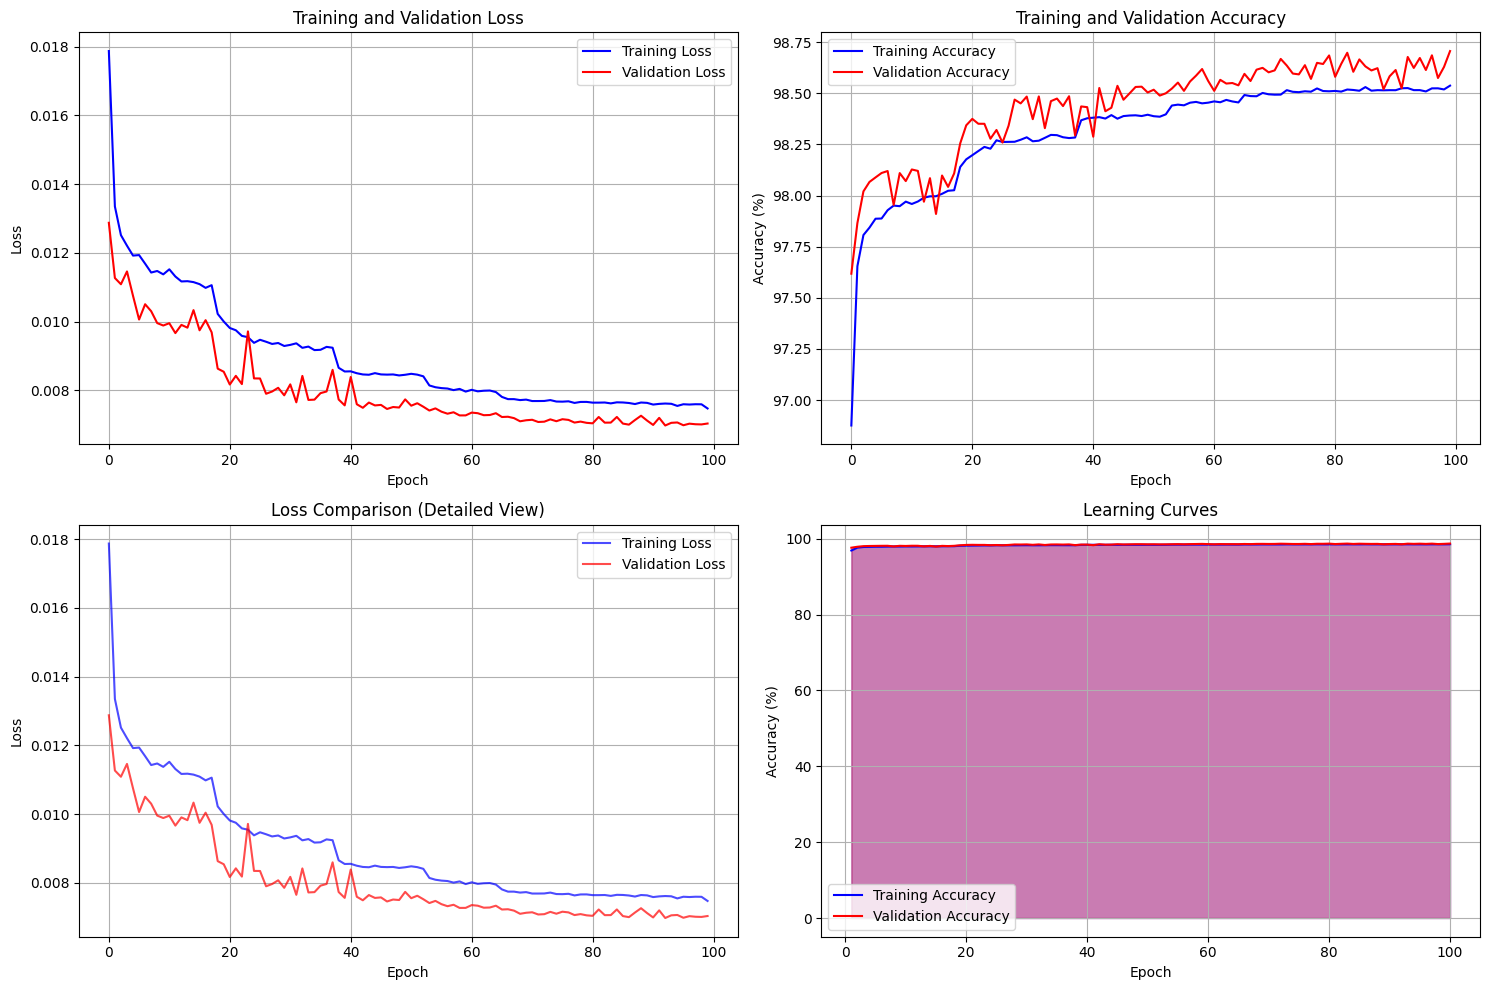

Making predictions on test set...


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 493/493 [00:06<00:00, 73.94it/s]



TEST SET EVALUATION RESULTS
Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99    418892
   Malicious       0.95      0.97      0.96     85129

    accuracy                           0.99    504021
   macro avg       0.97      0.98      0.98    504021
weighted avg       0.99      0.99      0.99    504021

Accuracy: 0.9865
F1 Score: 0.9604
ROC-AUC Score: 0.9991


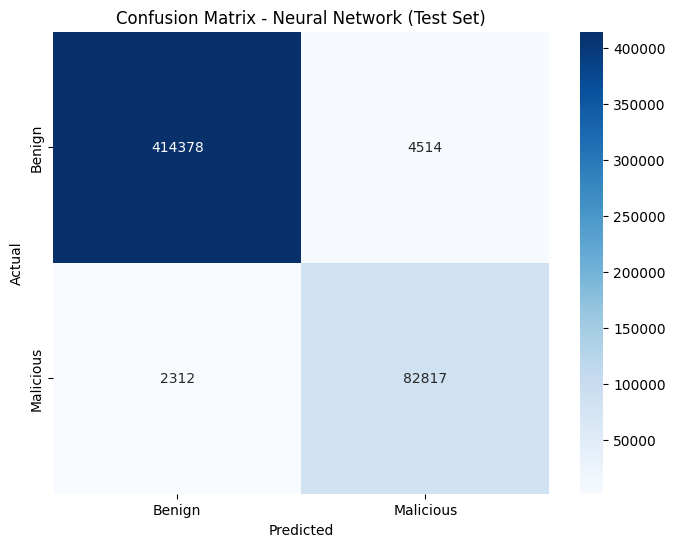


Classifying 100 random samples...


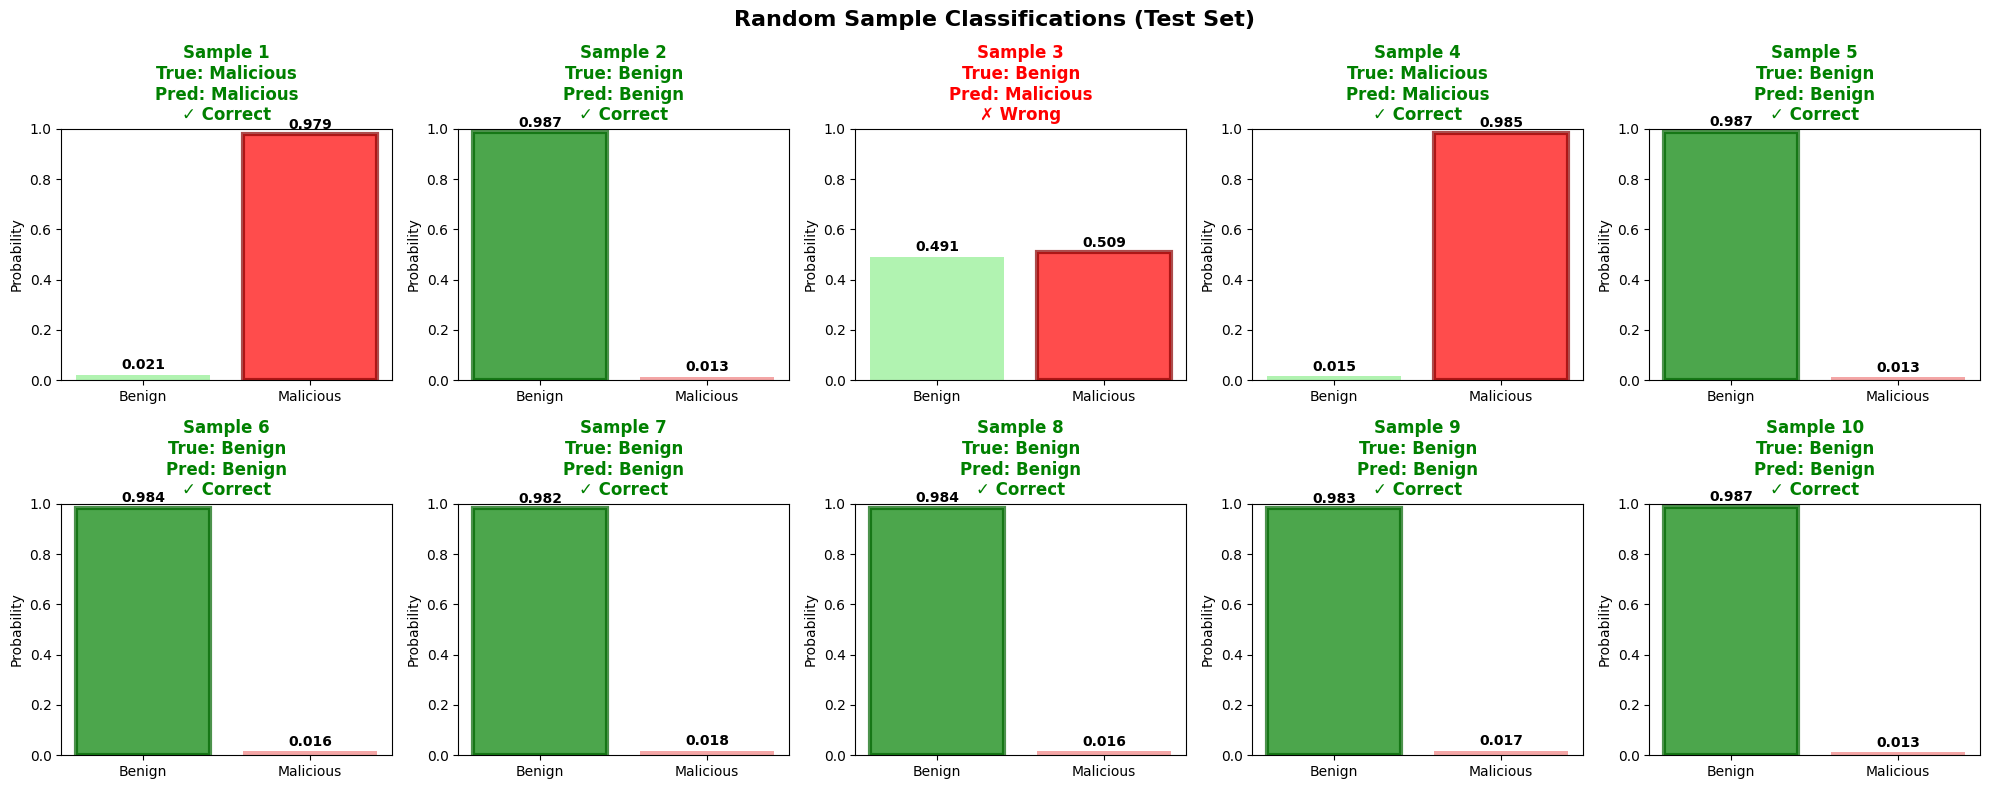


Detailed Sample Classification Results:
--------------------------------------------------------------------------------
Sample  1: True=Malicious | Pred=Malicious | Confidence=0.979 | ✓ CORRECT
Sample  2: True=Benign    | Pred=Benign    | Confidence=0.987 | ✓ CORRECT
Sample  3: True=Benign    | Pred=Malicious | Confidence=0.509 | ✗ WRONG
Sample  4: True=Malicious | Pred=Malicious | Confidence=0.985 | ✓ CORRECT
Sample  5: True=Benign    | Pred=Benign    | Confidence=0.987 | ✓ CORRECT
Sample  6: True=Benign    | Pred=Benign    | Confidence=0.984 | ✓ CORRECT
Sample  7: True=Benign    | Pred=Benign    | Confidence=0.982 | ✓ CORRECT
Sample  8: True=Benign    | Pred=Benign    | Confidence=0.984 | ✓ CORRECT
Sample  9: True=Benign    | Pred=Benign    | Confidence=0.983 | ✓ CORRECT
Sample 10: True=Benign    | Pred=Benign    | Confidence=0.987 | ✓ CORRECT
Sample 11: True=Malicious | Pred=Malicious | Confidence=0.992 | ✓ CORRECT
Sample 12: True=Benign    | Pred=Benign    | Confidence=0.987 | ✓ 

In [35]:
# Initialize classifier with your combined_df
classifier = CICIDSNeuralClassifier(combined_df=combined_df_cleaned)

# Preprocess data
X, y = classifier.preprocess_data()

# Split data into train/validation/test (60%/20%/20%)
classifier.split_data(test_size=0.2, val_size=0.2)

# Create data loaders
classifier.create_data_loaders(batch_size=1024)

# Create and train model
classifier.create_model(hidden_dims=[1024, 1024, 512, 512, 256, 256, 128, 128], dropout_rate=0.3)

# Train with focal loss and validation monitoring
train_losses, train_accuracies, val_losses, val_accuracies = classifier.train_model(
    epochs=100,
    learning_rate=0.001,
    focal_alpha=1,
    focal_gamma=2,
    patience=10
)

# Evaluate model on test set
results = classifier.evaluate_model()

# Classify random samples and visualize
sample_results = classifier.classify_random_samples(n_samples=100)

# Save model
classifier.save_model('cicids_neural_network_enhanced.pth')